# week 6
## pooling and dropout in CNNs
### part3: Compare the performance of models with and without dropout on a classification task


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0     # Normalize to [0,1]
x_train = x_train.reshape(-1, 28, 28, 1)     # Reshape for CNN
x_test = x_test.reshape(-1, 28, 28, 1)

# Define CNN model without dropout
def create_model_without_dropout():
    model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define CNN model with dropout
def create_model_with_dropout():
    model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),     # Dropout layer with 50% dropout rate
    layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [3]:
# Train both models
model_no_dropout = create_model_without_dropout()
history_no_dropout = model_no_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

model_with_dropout = create_model_with_dropout()
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1494 - accuracy: 0.9538 - val_loss: 0.0464 - val_accuracy: 0.9854
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0478 - accuracy: 0.9852 - val_loss: 0.0284 - val_accuracy: 0.9904
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0282 - val_accuracy: 0.9917
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0340 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0277 - val_accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0315 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0323 - val_ac

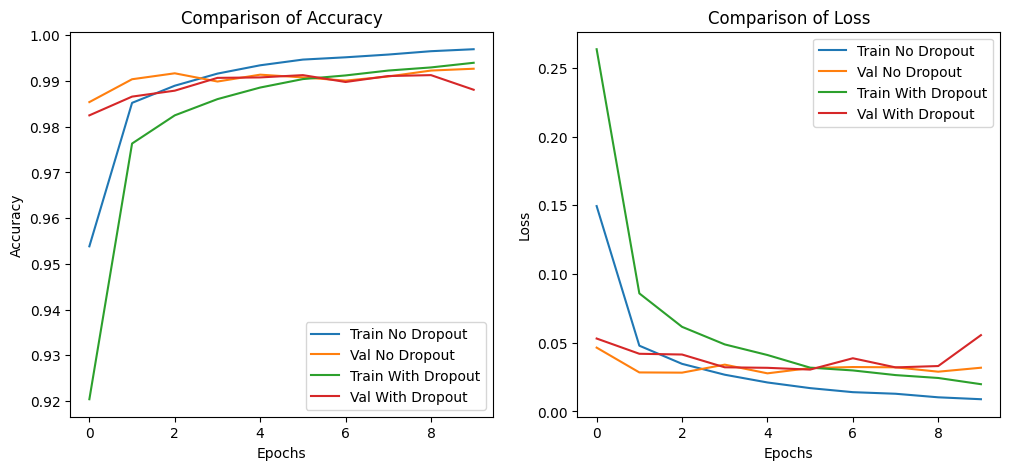

In [4]:
# Plot the accuracy and loss comparisons
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history['accuracy'], label='Train No Dropout')
plt.plot(history_no_dropout.history['val_accuracy'], label='Val No Dropout')
plt.plot(history_with_dropout.history['accuracy'], label='Train With Dropout')
plt.plot(history_with_dropout.history['val_accuracy'], label='Val With Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparison of Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_no_dropout.history['loss'], label='Train No Dropout')
plt.plot(history_no_dropout.history['val_loss'], label='Val No Dropout')
plt.plot(history_with_dropout.history['loss'], label='Train With Dropout')
plt.plot(history_with_dropout.history['val_loss'], label='Val With Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Comparison of Loss')

plt.show()
